# Novel Summarizer

#### Team: Soham Sengupta (16BLC1001), Rishab Agarwal (16BLC1130), Phillip Jebakumar (16BLC1043)

#### **Overview**

The project aims to summarize any variable-length body of text, such as novels, by deciding how much to keep and how much to leave out. That is, it *predicts* the ratio of the summary's sentence count to the original article's sentence count, using the original wordcounts. Armed with this 'recommended ratio', it goes on to use the gensim summarizer to generate the summary.

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
from gensim.summarization.summarizer import summarize
from scipy.interpolate import LSQUnivariateSpline
from nltk.tokenize import sent_tokenize
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrix
import numpy as np
import errno
import glob
import os
articles_folder = 'C:/Users/Soham/OneDrive/TinkrCornr/NovelSummarizer/articles/*.*'
summaries_folder = 'C:/Users/Soham/OneDrive/TinkrCornr/NovelSummarizer/summarized/*.*'
article_file_paths = glob.glob(articles_folder)
summary_file_paths = glob.glob(summaries_folder)
#% matplotlib inline

C:\Users\Soham\Anaconda3\envs\NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")



#### This is the data accumulation and training phase of the project


In [2]:
#wordcounts of articles
article_wc_list = []
for path in article_file_paths:
    words_in_file = 0
    with open(path, 'r') as f:
        for line in f:
            words = line.split()
            words_in_file += len(words)
    article_wc_list.append(words_in_file)
print("Article word counts: ",sorted(article_wc_list))

Article word counts:  [180, 284, 303, 410, 435, 532, 611, 667, 766, 813, 893, 912, 1089, 1098, 1367]


In [3]:
#wordcounts of summaries
summary_wc_list = []
for path in summary_file_paths:
    words_in_file = 0
    with open(path, 'r') as f:
        for line in f:
            words = line.split()
            words_in_file += len(words)
    summary_wc_list.append(words_in_file)
print("Summary word counts: ",summary_wc_list)

Summary word counts:  [29, 42, 37, 49, 37, 51, 33, 47, 62, 56, 43, 43, 40, 46, 41]


In [4]:
#sentence ratios
article_sc_list = []
summary_sc_list = []
for path in article_file_paths:
    sentences_in_file = 0
    with open(path, 'r') as f:
        file_text=f.read().replace('\n', '. ')
        sentences = sent_tokenize(file_text)
        sentences_in_file += len(sentences)
    article_sc_list.append(sentences_in_file)
    
for path in summary_file_paths:
    sentences_in_file = 0
    with open(path, 'r') as f:
        file_text=f.read().replace('\n', '. ')
        sentences = sent_tokenize(file_text)
        sentences_in_file += len(sentences)
    summary_sc_list.append(sentences_in_file)

sc_ratios = []
for i in range(0, len(article_sc_list)):
    sc_ratios.append(summary_sc_list[i]/article_sc_list[i])

print("\nSummary sc's: ",summary_sc_list)
print("\nArticle sc's: ",article_sc_list)

sc_ratios = [round(i,3) for i in sc_ratios]
print("\nSentence Count Ratios: ",sc_ratios)


Summary sc's:  [2, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3]

Article sc's:  [19, 20, 54, 10, 46, 66, 31, 41, 28, 103, 15, 32, 94, 41, 40]

Sentence Count Ratios:  [0.105, 0.2, 0.056, 0.4, 0.065, 0.061, 0.097, 0.098, 0.143, 0.039, 0.267, 0.125, 0.032, 0.098, 0.075]


### Model 1: Polynomial Regression
####  
#### We now train this model to predict the ratios from the article wordcounts.

In [21]:
# Train and Test data for regression

X_data = np.array(article_wc_list)
y_targets = sc_ratios

#Specify no. of test data points
tp = 5

# Split the data into training/testing sets
X_train = np.array(X_data[:-tp])
X_test = np.array(X_data[-tp:])

# Split the targets into training/testing sets
y_train = np.array(y_targets[:-tp])
y_test = np.array(y_targets[-tp:])

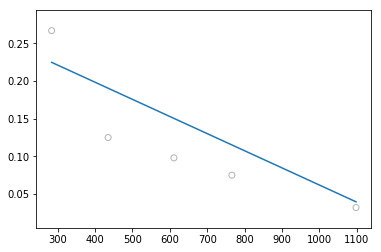

In [22]:
########### Polynomial Regression ###########

# Generating weights for polynomial function with degree 1
weights = np.polyfit(X_train, y_train, 1)

# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on test data
y_pred = model(X_test)

# Plotting the regression curve
xp = np.linspace(X_test.min(),X_test.max(),10)
pred_plot = model(xp)
plt.scatter(X_test, y_test, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [23]:
# Metrics

print("Mean squared error: ", mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error:  0.00209693260883
Variance score (R^2): 0.67


#### Our model is now ready, and we can use it to get our summaries

In [13]:
#use the model to predict a summarization ratio to an input file
#path = input("Enter an article path: ") 
path = "C:/article.txt"
wc = 0
with open(path, 'r') as f:
    text = f.read()
    for line in text:
        words = line.split()
        wc += len(words)
print("Wordcounts: ",wc)
recommended_ratio = (model(1400))
recommended_ratio = 0.2 if (recommended_ratio<0) else recommended_ratio
print("Recommended Ratio: ",recommended_ratio)

print("\nSummary: \n",summarize(text, ratio=recommended_ratio, split=True))

#with open("system_summaries/system_summary.001.txt","+w") as f:
#    print("{}".format(summarize(text, ratio=recommended_ratio, split=True)),file = f)

Wordcounts:  1564
Recommended Ratio:  0.2

Summary: 
 ['The institute said health officers would board the ship in Houston to investigate the gastrointestinal illness, which is causing vomiting and diarrhea.', "Nearly 700 crew and passengers fell ill aboard the Royal Caribbean's Explorer of the Seas, the highest number of sick people reported on any cruise ship in two decades, CDC data show.", 'To compare the cruises, 5.22% of passengers on the Caribbean Princess reported being ill, versus 20.5% on the Explorer of the Seas.']


### Model 2: Natural Cubic Spline
####  
#### We now train this model to predict the ratios from the article wordcounts.

In [26]:
# Set the knots manually
knots=[450,850]
print(X_train)
print(y_train)
# Fit a LSQunivariate spline
s = LSQUnivariateSpline((X_train),(y_train),knots)

#Plot the spline
xs = np.linspace(40,2000,10)
ys = s(xs)
plt.scatter(X_train, y_train)
plt.plot(xs, ys)
plt.savefig('fig2.png', bbox_inches='tight')

[ 410  303  893  180 1089  912  667  813  532 1367]
[ 0.105  0.2    0.056  0.4    0.065  0.061  0.097  0.098  0.143  0.039]


ValueError: x must be strictly increasing

In [48]:
# Generating cubic spline with 2 knots at 450 and 850
transformed_X = dmatrix("bs(X_data, df=6, degree=1, include_intercept=False)", 
                        {"X_data": X_data},return_type='dataframe')
print(X_data)
print(y_targets)
# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(y_targets, transformed_X).fit()

# Predictions
pred1 = fit1.predict(dmatrix("bs(X_data, knots=(450,850), include_intercept=False)", 
                             {"X_data": X_data}, return_type='dataframe'))

# Calculating RMSE values
rms1 = sqrt(mean_squared_error(y_targets, pred1))
print(rms1)

[ 410  303  893  180 1089  912  667  813  532 1367  284  435 1098  611  766]
[0.105, 0.2, 0.056, 0.4, 0.065, 0.061, 0.097, 0.098, 0.143, 0.039, 0.267, 0.125, 0.032, 0.098, 0.075]


ValueError: shapes (15,6) and (7,) not aligned: 6 (dim 1) != 7 (dim 0)

In [50]:
# We will plot the graph for 15 observations only
xp = np.linspace(X_test.min(),X_test.max(),15)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(450,850), include_intercept=False)", 
                             {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(X_data, y_targets, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree=3 with 2 knots')
plt.legend()
#plt.xlim(15,85)
#plt.ylim(0,350)
plt.xlabel('wordcounts')
plt.ylabel('ratios')
plt.show()

ValueError: shapes (15,6) and (7,) not aligned: 6 (dim 1) != 7 (dim 0)

#### Additionally, we calculate some metrics to judge the quality of summarization
#### (Based on precision, recall and f-score


In [9]:
#calculate rouge metric
from pyrouge import Rouge155
r = Rouge155()

r.system_dir = 'system_summaries'
r.model_dir = 'model_summaries'
r.system_filename_pattern = 'system_summary.(\d+).txt'
r.model_filename_pattern = 'model_summary.[A-Z].#ID#.txt'

#Rouge155.convert_summaries_to_rouge_format('system_summaries', 'system_summaries')
#Rouge155.convert_summaries_to_rouge_format('model_summaries', 'model_summaries')

output = r.convert_and_evaluate()
print(output)
output_dict = r.output_to_dict(output)

2018-10-10 19:14:57,780 [MainThread  ] [INFO ]  Writing summaries.
2018-10-10 19:14:57,786 [MainThread  ] [INFO ]  Processing summaries. Saving system files to C:\Users\Soham\AppData\Local\Temp\tmppmobryj2\system and model files to C:\Users\Soham\AppData\Local\Temp\tmppmobryj2\model.
2018-10-10 19:14:57,788 [MainThread  ] [INFO ]  Processing files in system_summaries.
2018-10-10 19:14:57,790 [MainThread  ] [INFO ]  Processing system_summary.001.txt.
2018-10-10 19:14:57,794 [MainThread  ] [INFO ]  Saved processed files to C:\Users\Soham\AppData\Local\Temp\tmppmobryj2\system.
2018-10-10 19:14:57,796 [MainThread  ] [INFO ]  Processing files in model_summaries.
2018-10-10 19:14:57,799 [MainThread  ] [INFO ]  Processing model_summary.A.001.txt.
2018-10-10 19:14:57,802 [MainThread  ] [INFO ]  Saved processed files to C:\Users\Soham\AppData\Local\Temp\tmppmobryj2\model.
2018-10-10 19:14:57,830 [MainThread  ] [INFO ]  Written ROUGE configuration to C:\Users\Soham\AppData\Local\Temp\tmpk5fawfj1

---------------------------------------------
1 ROUGE-1 Average_R: 0.44828 (95%-conf.int. 0.44828 - 0.44828)
1 ROUGE-1 Average_P: 0.23636 (95%-conf.int. 0.23636 - 0.23636)
1 ROUGE-1 Average_F: 0.30952 (95%-conf.int. 0.30952 - 0.30952)
---------------------------------------------
1 ROUGE-2 Average_R: 0.07143 (95%-conf.int. 0.07143 - 0.07143)
1 ROUGE-2 Average_P: 0.03704 (95%-conf.int. 0.03704 - 0.03704)
1 ROUGE-2 Average_F: 0.04878 (95%-conf.int. 0.04878 - 0.04878)
---------------------------------------------
1 ROUGE-3 Average_R: 0.03704 (95%-conf.int. 0.03704 - 0.03704)
1 ROUGE-3 Average_P: 0.01887 (95%-conf.int. 0.01887 - 0.01887)
1 ROUGE-3 Average_F: 0.02500 (95%-conf.int. 0.02500 - 0.02500)
---------------------------------------------
1 ROUGE-4 Average_R: 0.00000 (95%-conf.int. 0.00000 - 0.00000)
1 ROUGE-4 Average_P: 0.00000 (95%-conf.int. 0.00000 - 0.00000)
1 ROUGE-4 Average_F: 0.00000 (95%-conf.int. 0.00000 - 0.00000)
---------------------------------------------
1 ROUGE-L Aver